# Import Modules

In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
import pickle
import os
from langdetect import detect # slow detecting language

import multiprocessing as mp
import numpy as np
import time
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], processText, workers=cores)

from nltk.corpus import wordnet
def lemmaWord(word):
    lemma = wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word
# def processText(text,lemma=False, gram=1):
#     text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE) #delete URL, # , and @xxx
#     tokens = word_tokenize(text)
#     whitelist = ["n't", "not", "no"]
#     tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stopwordEn or i.lower() in whitelist) and i.isalpha()]
#     if gram<=1:
#         return tokens
#     else:
#         return [i for i in nltk.ngrams(tokens, gram)]

CPU numbers: 32


# Combine one-day data into a single file

In [8]:
# add new data 19-24, 30 Mar
dates = [i for i in range(19,31) if i not in range(25,30)] # 19-24,30
for d in tqdm(dates):
    dfs =  [i for i in os.listdir('data_0323-29') if i[:2]=='df']
    files = [f for f in dfs if f[5:7]==str(d)]
    if len(files) > 1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df_1 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_1))
        try:
            with open('./data_0323-29/{}'.format(files[1]), 'rb') as handle:
                df_2 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_2))
        df = pd.concat([df_2, df_1])

    elif len(files)==1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df = pickle.load(handle)
        except Exception as e:
            print(e)
    with open('df_03{}_tweets.pickle'.format(d), 'wb') as handle:
        pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Mar ",d, "@length:",df.shape)

 14%|█▍        | 1/7 [00:02<00:12,  2.08s/it]

Mar  19 @length: (311488, 3)


 29%|██▊       | 2/7 [00:09<00:17,  3.55s/it]

Mar  20 @length: (1077604, 3)


 43%|████▎     | 3/7 [00:15<00:18,  4.54s/it]

Mar  21 @length: (1065349, 3)


 57%|█████▋    | 4/7 [00:25<00:18,  6.10s/it]

Mar  22 @length: (1379022, 3)


 71%|███████▏  | 5/7 [00:37<00:15,  7.93s/it]

Mar  23 @length: (1320665, 3)


 86%|████████▌ | 6/7 [00:49<00:08,  8.98s/it]

Mar  24 @length: (1202356, 3)


100%|██████████| 7/7 [00:53<00:00,  7.62s/it]

Mar  30 @length: (530800, 3)


In [3]:
# Combine and save data
dates = range(23,30) 
dates = [i for i in range(19,31) if i not in range(25,30)] # 19-24,30
for d in tqdm(dates):
    dfs =  [i for i in os.listdir('data_0323-29') if i[:2]=='df']
    files = [f for f in dfs if f[5:7]==str(d)]
    if len(files) > 1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df_1 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_1))
        try:
            with open('./data_0323-29/{}'.format(files[1]), 'rb') as handle:
                df_2 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_2))
        df = pd.concat([df_2, df_1])

    elif len(files)==1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df = pickle.load(handle)
        except Exception as e:
            print(e)
    with open('df_03{}_tweets.pickle'.format(d), 'wb') as handle:
        pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Mar ",d, "@length:",df.shape)

 14%|█▍        | 1/7 [00:08<00:50,  8.44s/it]

Mar  23 @length: (1172668, 3)


 29%|██▊       | 2/7 [00:18<00:45,  9.04s/it]

Mar  24 @length: (1202356, 3)


 43%|████▎     | 3/7 [00:26<00:34,  8.67s/it]

Mar  25 @length: (987039, 3)
list indices must be integers or slices, not str


 57%|█████▋    | 4/7 [00:32<00:23,  7.89s/it]

Mar  26 @length: (1023161, 3)
'utf-8' codec can't decode byte 0xe5 in position 117: invalid continuation byte


 71%|███████▏  | 5/7 [00:42<00:16,  8.44s/it]

Mar  27 @length: (1443201, 3)


 86%|████████▌ | 6/7 [00:49<00:07,  7.94s/it]

Mar  28 @length: (834611, 3)


100%|██████████| 7/7 [00:52<00:00,  7.44s/it]

Mar  29 @length: (333494, 3)


In [74]:
# from scratch(not using combined df) (deprecated, data is delted)
TOP_COMMON_2G = 5000
dates = range(23,30)
for d in tqdm(dates):
    dfs =  [i for i in os.listdir('data_0323-29') if i[:2]=='df']
    files = [f for f in dfs if f[5:7]==str(d)]
    if len(files) > 1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df_1 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_1))
        try:
            with open('./data_0323-29/{}'.format(files[1]), 'rb') as handle:
                df_2 = pickle.load(handle)
        except Exception as e:
            print(e)
#         print(len(df_2))
        df = pd.concat([df_2, df_1])

    elif len(files)==1:
        try:
            with open('./data_0323-29/{}'.format(files[0]), 'rb') as handle:
                df = pickle.load(handle)
        except Exception as e:
            print(e)
    print("Mar ",d, "@length:",df.shape)
    
    full_texts = df[df['re_full_text']!='']['re_full_text'] # 转发的原文
    print("Retweets:",len(full_texts), "uniqe retweets:",len(full_texts.unique())) #转发的原推数
    full_texts_orig = df[df['re_full_text']=='']['full_text'] #原创的且未在这个时间段被转发过
    print("Original tweets:",len(full_texts_orig),"unique original tweets:",len(full_texts_orig.unique())) #大部分原创推特都没有重复
    full_texts_all = pd.concat([full_texts,full_texts_orig])
    print("All tweets:",len(full_texts_all),"unique tweets:",len(full_texts_all.unique()))
    
    all_words = []
    for i in apply_by_multiprocessing(full_texts_all, processText, workers=32):
        all_words.extend(i)
    words_dict = nltk.FreqDist(all_words)
    words_dict_2g_tuple = nltk.FreqDist(nltk.ngrams(all_words, 2))
    words_dict_2g =  nltk.FreqDist()
    for k,v in words_dict_2g_tuple.most_common(TOP_COMMON_2G):
            words_dict_2g[' '.join(k)] = v
    print("all_words length:",len(all_words),"words_dict length",len(words_dict),"words_dict_2g",len(words_dict_2g_tuple))
    
    with open('./data_032329_new/all_words_03{}.pickle'.format(d), 'wb') as handle:
        pickle.dump(all_words, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('./data_032329_new/words_dict_03{}.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('./data_032329_new/words_dict_2g_03{}.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict_2g, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del(all_words)

  0%|          | 0/7 [00:00<?, ?it/s]

Mar  23 @length: (1172668, 3)
Retweets: 853969 uniqe retweets: 75447
Original tweets: 318699 unique original tweets: 316639
All tweets: 1172668 unique tweets: 341170
all_words length: 18121021 words_dict length 192751 words_dict_2g 2246512


 14%|█▍        | 1/7 [02:24<14:27, 144.61s/it]

Mar  24 @length: (1202356, 3)
Retweets: 858661 uniqe retweets: 78062
Original tweets: 343695 unique original tweets: 341361
All tweets: 1202356 unique tweets: 367769
all_words length: 19080961 words_dict length 205510 words_dict_2g 2408711


 29%|██▊       | 2/7 [05:30<13:04, 156.91s/it]

Mar  25 @length: (987039, 3)
Retweets: 675491 uniqe retweets: 69887
Original tweets: 311548 unique original tweets: 309255
All tweets: 987039 unique tweets: 333881
all_words length: 14387321 words_dict length 197176 words_dict_2g 2232562


 43%|████▎     | 3/7 [07:47<10:04, 151.04s/it]

list indices must be integers or slices, not str
Mar  26 @length: (1023161, 3)
Retweets: 704306 uniqe retweets: 70992
Original tweets: 318855 unique original tweets: 316513
All tweets: 1023161 unique tweets: 340474
all_words length: 15468913 words_dict length 200497 words_dict_2g 2278980


 57%|█████▋    | 4/7 [10:01<07:17, 145.94s/it]

'utf-8' codec can't decode byte 0xe5 in position 117: invalid continuation byte
Mar  27 @length: (1443201, 3)
Retweets: 944547 uniqe retweets: 109837
Original tweets: 498654 unique original tweets: 494602
All tweets: 1443201 unique tweets: 531790
all_words length: 21862249 words_dict length 274557 words_dict_2g 3295871


 71%|███████▏  | 5/7 [13:11<05:18, 159.08s/it]

Mar  28 @length: (834611, 3)
Retweets: 566148 uniqe retweets: 61787
Original tweets: 268463 unique original tweets: 266336
All tweets: 834611 unique tweets: 289814
all_words length: 13154178 words_dict length 182446 words_dict_2g 2017403


 86%|████████▌ | 6/7 [15:10<02:27, 147.18s/it]

Mar  29 @length: (333494, 3)
Retweets: 236802 uniqe retweets: 27803
Original tweets: 96692 unique original tweets: 96002
All tweets: 333494 unique tweets: 110814
all_words length: 5407044 words_dict length 94337 words_dict_2g 896472


100%|██████████| 7/7 [16:04<00:00, 137.80s/it]


In [6]:
# UNIQUE Tweets
TOP_COMMON_2G = 5000
dates = range(23,30)
for d in tqdm(dates):
    with open('df_03{}_tweets.pickle'.format(d), 'rb') as handle:
        df = pickle.load(handle)
    
    print("Mar ",d, "@length:",df.shape)
    
    full_texts = df[df['re_full_text']!='']['re_full_text'] # 转发的原文
    print("Retweets:",len(full_texts), "uniqe retweets:",len(full_texts.unique())) #转发的原推数
    full_texts_orig = df[df['re_full_text']=='']['full_text'] #原创的且未在这个时间段被转发过
    print("Original tweets:",len(full_texts_orig),"unique original tweets:",len(full_texts_orig.unique())) #大部分原创推特都没有重复
    full_texts_all = pd.concat([full_texts,full_texts_orig])
    full_texts_all_uni = pd.Series(full_texts_all.unique())
    print("All tweets:",len(full_texts_all),"unique tweets:",len(full_texts_all_uni))
    
    all_words = []
    for i in apply_by_multiprocessing(full_texts_all_uni, processText, workers=32):
        all_words.extend(i)
    words_dict = nltk.FreqDist(all_words)
    words_dict_2g_tuple = nltk.FreqDist(nltk.ngrams(all_words, 2))
    words_dict_2g =  nltk.FreqDist()
    for k,v in words_dict_2g_tuple.most_common(TOP_COMMON_2G):
            words_dict_2g[' '.join(k)] = v
    print("all_words length:",len(all_words),"words_dict length",len(words_dict),"words_dict_2g",len(words_dict_2g_tuple))
    
    with open('./data_032329_unique/words_dict_03{}.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('./data_032329_unique/words_dict_2g_03{}.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict_2g, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del(all_words)

  0%|          | 0/7 [00:00<?, ?it/s]

Mar  23 @length: (1172668, 3)
Retweets: 853969 uniqe retweets: 75447
Original tweets: 318699 unique original tweets: 316639
All tweets: 1172668 unique tweets: 341170
all_words length: 4536308 words_dict length 192751 words_dict_2g 2038704


 14%|█▍        | 1/7 [00:57<05:45, 57.53s/it]

Mar  24 @length: (1202356, 3)
Retweets: 858661 uniqe retweets: 78062
Original tweets: 343695 unique original tweets: 341361
All tweets: 1202356 unique tweets: 367769
all_words length: 4968142 words_dict length 205510 words_dict_2g 2205474


 29%|██▊       | 2/7 [01:51<04:42, 56.40s/it]

Mar  25 @length: (987039, 3)
Retweets: 675491 uniqe retweets: 69887
Original tweets: 311548 unique original tweets: 309255
All tweets: 987039 unique tweets: 333881
all_words length: 4426897 words_dict length 197176 words_dict_2g 2046412


 43%|████▎     | 3/7 [02:36<03:31, 52.97s/it]

Mar  26 @length: (1023161, 3)
Retweets: 704306 uniqe retweets: 70992
Original tweets: 318855 unique original tweets: 316513
All tweets: 1023161 unique tweets: 340474
all_words length: 4539369 words_dict length 200497 words_dict_2g 2085362


 57%|█████▋    | 4/7 [03:20<02:30, 50.25s/it]

Mar  27 @length: (1443201, 3)
Retweets: 944547 uniqe retweets: 109837
Original tweets: 498654 unique original tweets: 494602
All tweets: 1443201 unique tweets: 531790
all_words length: 7070613 words_dict length 274557 words_dict_2g 3017202


 71%|███████▏  | 5/7 [04:25<01:49, 54.90s/it]

Mar  28 @length: (834611, 3)
Retweets: 566148 uniqe retweets: 61787
Original tweets: 268463 unique original tweets: 266336
All tweets: 834611 unique tweets: 289814
all_words length: 4005713 words_dict length 182446 words_dict_2g 1859688


 86%|████████▌ | 6/7 [05:08<00:51, 51.21s/it]

Mar  29 @length: (333494, 3)
Retweets: 236802 uniqe retweets: 27803
Original tweets: 96692 unique original tweets: 96002
All tweets: 333494 unique tweets: 110814
all_words length: 1538740 words_dict length 94337 words_dict_2g 827088


100%|██████████| 7/7 [05:30<00:00, 47.19s/it]


In [2]:
# UNIQUE Tweets + Leema
TOP_COMMON_2G = 5000
dates = range(23,30)
for d in tqdm(dates):
    with open('df_03{}_tweets.pickle'.format(d), 'rb') as handle:
        df = pickle.load(handle)
    
    print("Mar ",d, "@length:",df.shape)
    
    full_texts = df[df['re_full_text']!='']['re_full_text'] # 转发的原文
    print("Retweets:",len(full_texts), "uniqe retweets:",len(full_texts.unique())) #转发的原推数
    full_texts_orig = df[df['re_full_text']=='']['full_text'] #原创的且未在这个时间段被转发过
    print("Original tweets:",len(full_texts_orig),"unique original tweets:",len(full_texts_orig.unique())) #大部分原创推特都没有重复
    full_texts_all = pd.concat([full_texts,full_texts_orig])
    full_texts_all_uni = pd.Series(full_texts_all.unique())
    print("All tweets:",len(full_texts_all),"unique tweets:",len(full_texts_all_uni))
    
    all_words = []
    for i in apply_by_multiprocessing(full_texts_all_uni, processText, workers=32, lemma=True):
        all_words.extend(i)
    words_dict = nltk.FreqDist(all_words)
    words_dict_2g_tuple = nltk.FreqDist(nltk.ngrams(all_words, 2))
    words_dict_2g =  nltk.FreqDist()
    for k,v in words_dict_2g_tuple.most_common(TOP_COMMON_2G):
            words_dict_2g[' '.join(k)] = v
    print("all_words length:",len(all_words),"words_dict length",len(words_dict),"words_dict_2g",len(words_dict_2g_tuple))
    
    with open('./data_032329_unique/words_dict_03{}_lemma.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('./data_032329_unique/words_dict_2g_03{}_lemma.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict_2g, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del(all_words)

  0%|          | 0/7 [00:00<?, ?it/s]

Mar  23 @length: (1172668, 3)
Retweets: 853969 uniqe retweets: 75447
Original tweets: 318699 unique original tweets: 316639
All tweets: 1172668 unique tweets: 341170
all_words length: 4140548 words_dict length 179637 words_dict_2g 1824549


 14%|█▍        | 1/7 [00:37<03:46, 37.81s/it]

Mar  24 @length: (1202356, 3)
Retweets: 858661 uniqe retweets: 78062
Original tweets: 343695 unique original tweets: 341361
All tweets: 1202356 unique tweets: 367769
all_words length: 4534196 words_dict length 191928 words_dict_2g 1971257


 29%|██▊       | 2/7 [01:21<03:17, 39.46s/it]

Mar  25 @length: (987039, 3)
Retweets: 675491 uniqe retweets: 69887
Original tweets: 311548 unique original tweets: 309255
All tweets: 987039 unique tweets: 333881
all_words length: 4037222 words_dict length 183737 words_dict_2g 1833585


 43%|████▎     | 3/7 [02:01<02:38, 39.63s/it]

Mar  26 @length: (1023161, 3)
Retweets: 704306 uniqe retweets: 70992
Original tweets: 318855 unique original tweets: 316513
All tweets: 1023161 unique tweets: 340474
all_words length: 4139426 words_dict length 186970 words_dict_2g 1868374


 57%|█████▋    | 4/7 [02:40<01:58, 39.43s/it]

Mar  27 @length: (1443201, 3)
Retweets: 944547 uniqe retweets: 109837
Original tweets: 498654 unique original tweets: 494602
All tweets: 1443201 unique tweets: 531790
all_words length: 6454426 words_dict length 258743 words_dict_2g 2695441


 71%|███████▏  | 5/7 [03:36<01:29, 44.62s/it]

Mar  28 @length: (834611, 3)
Retweets: 566148 uniqe retweets: 61787
Original tweets: 268463 unique original tweets: 266336
All tweets: 834611 unique tweets: 289814
all_words length: 3652486 words_dict length 169643 words_dict_2g 1667494


 86%|████████▌ | 6/7 [04:12<00:42, 42.01s/it]

Mar  29 @length: (333494, 3)
Retweets: 236802 uniqe retweets: 27803
Original tweets: 96692 unique original tweets: 96002
All tweets: 333494 unique tweets: 110814
all_words length: 1403572 words_dict length 85528 words_dict_2g 745630


100%|██████████| 7/7 [04:31<00:00, 38.84s/it]


# New Filter

In [163]:
# New Filter    
def sub_ent(i,length):
    p = float(i/length) #频率作为概率
    logp = np.log2(p)
    return -1 * p * logp
def calc_ent(x):
    if x is not None:
        x_dict = pd.Series(x).value_counts()
        return x_dict.apply(sub_ent, length=len(x)).sum()

stopwordEn = stopwords.words('english')
stopwordEn.extend(['amp'])
whitelist = ["n't", "not", "no"]
def prepareText(i,lemma=False, gram=1):
    i = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', i, flags=re.MULTILINE) #delete URL, # , and @xxx
    if len(i) > 10: # delete tweet contains less than 5 characters
        samples = int(len(i)* 0.1) # sampling 10% characters
        random_c = np.random.choice(len(i),replace=False, size=samples if samples > 5 else 5) # at least 5 samples
        # if less than 50% sampled character is not English charater, delete the tweets 
        if sum([1 if (i[s] >= u'\u0041' and i[s] <= u'\u005a') or (i[s] >= u'\u0061' and i[s] <= u'\u007a')\
                or i[s].isspace() or i[s].isdigit() or i[s] in [' ','.',',','!'] else 0 for s in random_c]) > len(random_c)/2 :
#             if detect(i)=='en': #slow but accuracte language detect
                tokens = word_tokenize(i)
                tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stopwordEn or i.lower() in whitelist) and i.isalpha()]
                if gram>1: tokens = [i for i in nltk.ngrams(tokens, gram)]
                if len(tokens) > 4: # 2.0 text entropy for 4 different words
                    entropy = calc_ent(tokens)
                    if entropy > 2:
                        return tokens #, entropy

## Test New Filter

In [5]:
    d=23
    with open('df_03{}_tweets.pickle'.format(d), 'rb') as handle:
        df = pickle.load(handle)
    full_texts = df[df['re_full_text']!=''].loc[:,['created_at','re_full_text']] # retweeted tweets
    full_texts_orig = df[df['re_full_text']==''].loc[:,['created_at','full_text']] # original tweets that haven't been retweeted
    full_texts = full_texts.rename(columns={'re_full_text':'full_text'})
    full_texts_all = pd.concat([full_texts,full_texts_orig]) # combine two types of tweets
    del full_texts, full_texts_orig
    full_texts_all = full_texts_all.drop_duplicates(['full_text']) # drop duplicated tweets
    full_texts_all.loc[:,'created_at'] = pd.to_datetime(full_texts_all.created_at)
    full_texts_all = full_texts_all.sort_values(by='created_at') # sort by date and time
    full_texts_all = full_texts_all.reset_index(drop=True)
    full_texts_all.head()

,created_at,full_text
0,2020-03-23 00:00:00+00:00,from guy who took last weekend off while Mitch...
1,2020-03-23 00:00:00+00:00,On Estate Agent Today - Why did Spicerhaart RE...
2,2020-03-23 00:00:00+00:00,My god how any one can do that ? first she is ...
3,2020-03-23 00:00:00+00:00,"Yo, she looks like an actual Resident Evil cha..."
4,2020-03-23 00:00:00+00:00,Please help me get this article out so that pe...


In [155]:
# Delete short tweets
deln=0
test_text = []
for i in full_texts_all.full_text[:10000]:
    i = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', i, flags=re.MULTILINE) #delete URL,井号, and @xxx
    if len(i) > 10: # delete tweet contain ing less than 10 characters
        test_text.append(i)
    else:
        print(i)
        deln+=1
deln

Deadass 
Awesome. 
sure jan 
ok ME 
Amin ,,,, 
This. 
My life 
So true 😐 
Amin 
AN ICON 
omg me 
Me af 
Good job! 
Before 😂 
very me 
No fr! 🤣 
😂deadddd 
Tocou. 
Lol same 
OMG SAME! 
Welp. 
YESSIR 
Unreal... 
what BS 
On God 
Amen 
Amin🙏 
No joke! 
Do it now 
Oh no! 
Too many 
Mantapp 
My God... 
amem 🙏🙏🙏🙏 
Nope 
This! 
Terrible  
ME AF. 
Dead 💀😂 
Sigh😕 
Too many 
😂😂😂😂 damn 
this!!!! 
Amen👇🏻 
this. 
Bacot u 
I support 
Crying 
Bruh 
Anies 
Fixed it  
Grave 😂 
fire fit. 
genial 
THIS 
Gbam! 
the cycle 
Lmfaoooo 
Trash!! 
THIS 
Lol rt 
Stonks 
PLS LOL 
Yeppers 
Obsessed 
Haduuuh 😥 
This 
Respect 🤗 
Me too :( 
 me af 
Fact 
Me today 
Roaring 
me irl 
 Thread:

A woman. 
TRUE LOVE 
Stock 
Whoops 😬 
 please 
Hilarious 
amem 
THIS! 👇 
Please! 
Phew 👇 
Of course 
Go away 
Agree 
JJ Will 
Atleast 8 
Amin 😇🙏
😎 
HOLYYYY 
👌🏾 times 
Q me meo 
respect!! 
My mother 
Agree.. 
This 
Same 
 Pathetic

Lmfao 
Great 
Amen 
Salute! 
Ummm hush 
not corona
Critics🤢😡 
Yes lol 
i'm safe🙌 
ISTO 
Shit 
Retweet 


134

In [156]:
pd.Series([len(i) for i in test_text1]).describe()

count    9853.000000
mean      122.322135
std        81.770359
min        11.000000
25%        54.000000
50%        98.000000
75%       186.000000
max       303.000000
dtype: float64

In [157]:
# Delete non-english tweets 
test_text1=[]
deln=0
for i in test_text:
        lemma=False
        samples = int(len(i)* 0.1) # sampling 1% characters 5-30, mean:12, mid:9
        np.random.seed(1)
        random_c = np.random.choice(len(i),replace=False, size=samples if samples > 5 else 5) # at least 5 samples
        # if less than 50% sampled character is not English charater, delete the tweets 
        if sum([1 if (i[s] >= u'\u0041' and i[s] <= u'\u005a') or (i[s] >= u'\u0061' and i[s] <= u'\u007a')\
                or i[s].isspace() or i[s].isdigit() or i[s] in [' ','.',',','!'] else 0 for s in random_c]) > len(random_c)/2 :
#             if detect(i)=='en': #slow but accuracte language detect
           test_text1.append(i)
        else:
            print(i)
            deln += 1
deln

Corona drive us ☹️☹️🥺 
"I got the Corona virus" 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣
👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼
....
This. 
 The Corona Virus has given People Rap skills. 😂🤣😁🎼🎵🙏🏾🎹🎙🎚🎤🎛🎺🎻🥁🎹🎼🎵🎶
Same. 🙋🏻‍♀️🙋🏻‍♀️🙋🏻‍♀️ 
    The Corona likes Paul alot🤧🤧🤧🤧🤧🤧🤧🤧😀🤧🤧🤧😀😀😀😀😀😀😀😀😀😀😀😀😀😀😀
HARVEY WEINSTEIN HAS CORONA 🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀
  Alles bullshit.🤦‍♂️


CNN: “CoRoNA ViRuS UPdAtEeEeeE”
Me: 
Just let them be😂😂😂😂😂 
It's back!!! ❤️❤️❤️❤️❤️😍😍😍😍 
  Here's the original tweet so he gets any likes he's due!
⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️

he said he has corona 😂😂😭😭😭😭😭😭 


13

In [158]:
# work tokenization, delete test containing less than 3 tokens
test_text2 = []
deln=0
lemma = False
gram=1
for i in test_text1:
    tokens = word_tokenize(i)
    tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stopwordEn or i.lower() in whitelist) and i.isalpha()]
    if gram>1: tokens = [i for i in nltk.ngrams(tokens, gram)]
    if len(tokens) > 4: # delte text containing less than or equal to 3 tokens
           test_text2.append(tokens)
    else:
        print(i, tokens)
        deln += 1
deln
    

Corona won’t let me out 🔐  ['corona', 'let']
COVID-19 is temporary. Drip is forever 👌🏽  ['temporary', 'drip', 'forever']
 biden died of corona ['biden', 'died', 'corona']
Hold up.... ✍🏾✍🏾  ['hold']
Corona-chan VS Earth-chan  ['vs']
Just waiting for  ‘s take on this  ['waiting', 'take']
The terrorists are. In the WHITE HOUSE.  ['terrorists', 'white', 'house']
Please leave my world  ['please', 'leave', 'world']
Fuck Corona  ['fuck', 'corona']
What a vile woman!  ['vile', 'woman']
😂😂😂😂 A3 funny asl  ['funny', 'asl']
the rhythm of the night - corona  ['rhythm', 'night', 'corona']
“I got corona” 🦠😂  ['got', 'corona']
District 1 tease  ['district', 'tease']
Let's all hope this it what is going down!  ['let', 'hope', 'going']
....relatable...  ['relatable']
Corona is the cure... ['corona', 'cure']
  Corona retreating 😂😂😂 ['corona', 'retreating']
It's that "Corona Clap!" 😷😷😷🤣🤣🤣  ['corona', 'clap']
Praying for you, Melanie.  ['praying', 'melanie']
 He kicked him with corona anger. ['kicked', 'c

1146

In [159]:
# delte low entropy text
test_text3 = []
ents = []
deln=0
for i in test_text2:
    entropy = calc_ent(i)
    if entropy > 2:
        test_text3.append(i)
        ents.append(entropy)
    else:
        print(i,entropy)
        deln+=1
deln

['soon', 'corona', 'doin', 'w'] 2.0
['corona', 'count', 'ghana', 'rises'] 2.0
['blue', 'gloves', 'corona', 'done'] 2.0
['world', 'corona', 'cup', 'indore'] 2.0
['clerics', 'not', 'healing', 'iran'] 2.0
['corona', 'chris', 'mann', 'via'] 2.0
['f', 'ck', 'corona', 'frfr'] 2.0
['hannity', 'personification', 'corona', 'virus'] 2.0
['goes', 'au', 'naturale', 'corona'] 2.0
['corona', 'got', 'acting', 'sis'] 2.0
['moscowmitch', 'fuckyou', 'corona', 'money'] 2.0
['confirmed', 'case', 'corona', 'orange'] 2.0
['corona', 'virus', 'ruining', 'everything'] 2.0
['amy', 'winehouse', 'could', 'never'] 2.0
['bored', 'corona', 'yt', 'discord'] 2.0
['corona', 'ink', 'let', 'talk'] 2.0
['corona', 'please', 'tired', 'get'] 2.0
['type', 'corona', 'mind', 'spreading'] 2.0
['tweet', 'didnt', 'age', 'well'] 2.0
['tl', 'things', 'universe', 'crossing'] 2.0
['prediction', 'academics', 'start', 'talking'] 2.0
['sorry', 'girl', 'terribly', 'terribly', 'sorry'] 1.5219280948873621
['corona', 'temporary', 'drip', 'fo

685

In [160]:
# filter output
res = pd.DataFrame({'ents':ents,'tokens':test_text3}).sort_values(by='ents').reset_index(drop=True)
res

,ents,tokens
0,2.235926,"[catch, corona, okk, okk, call, corona, bæ]"
1,2.235926,"[better, not, around, corona, vayrus, corona, ..."
2,2.235926,"[idiot, said, get, corona, get, idiot, deserves]"
3,2.235926,"[amount, corona, virus, porn, scares, corona, ..."
4,2.235926,"[day, corona, pendientes, youtube, day, corona..."
...,...,...
8017,5.286730,"[gc, gain, mutuals, follow, trick, follow, dad..."
8018,5.286730,"[gc, gain, mutuals, follow, trick, follow, dad..."
8019,5.321928,"[promo, gc, gainszn, bts, nct, ateez, blackpin..."
8020,5.358520,"[mommy, daddy, nsfw, nudes, rt, like, kpop, gc..."


In [161]:
res.ents.describe()

count    8022.000000
mean        3.502912
std         0.726035
min         2.235926
25%         2.807355
50%         3.467720
75%         4.142664
max         5.413977
Name: ents, dtype: float64

In [162]:
res[(res['ents']<2.5) & (res['ents']>2)]

,ents,tokens
0,2.235926,"[catch, corona, okk, okk, call, corona, bæ]"
1,2.235926,"[better, not, around, corona, vayrus, corona, ..."
2,2.235926,"[idiot, said, get, corona, get, idiot, deserves]"
3,2.235926,"[amount, corona, virus, porn, scares, corona, ..."
4,2.235926,"[day, corona, pendientes, youtube, day, corona..."
...,...,...
684,2.321928,"[lash, classes, continue, idgaf, corona]"
685,2.321928,"[know, end, corona, stop, talking]"
686,2.419382,"[normal, post, post, corona, new, normal, da, ..."
687,2.419382,"[stage, corona, movement, safe, norway, safe, ..."


## Run

In [164]:
# No lemma, new filter,19-31
TOP_COMMON_2G = 5000
dates = range(19,31)
for d in tqdm(dates):
    with open('df_03{}_tweets.pickle'.format(d), 'rb') as handle:
        df = pickle.load(handle)
    
    print("Mar ",d, "@length:",df.shape)
    full_texts = df[df['re_full_text']!=''].loc[:,['created_at','re_full_text']] # retweeted tweets
    full_texts_orig = df[df['re_full_text']==''].loc[:,['created_at','full_text']] # original tweets that haven't been retweeted
    full_texts = full_texts.rename(columns={'re_full_text':'full_text'})
    full_texts_all = pd.concat([full_texts,full_texts_orig]) # combine two types of tweets
    del full_texts, full_texts_orig
    full_texts_all = full_texts_all.drop_duplicates(['full_text']) # drop duplicated tweets
    full_texts_all.loc[:,'created_at'] = pd.to_datetime(full_texts_all.created_at)
    full_texts_all = full_texts_all.sort_values(by='created_at') # sort by date and time
    full_texts_all = full_texts_all.reset_index(drop=True)
    
    # save filtered tokens
    np.random.seed(1)
    full_texts_all.loc[:,'tokens'] = apply_by_multiprocessing(full_texts_all.full_text, prepareText, workers=32)
    full_texts_all = full_texts_all.dropna() # delete none tokens
    full_texts_all = full_texts_all.reset_index(drop=True)
    with open('./filtered_data/df_03{}_tweets_filtered.pickle'.format(d), 'wb') as handle:
        pickle.dump(full_texts_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
     
    # save
    all_words = []
    for i in full_texts_all.tokens:
        all_words.extend(i)
    del full_texts_all
    words_dict = nltk.FreqDist(all_words)
    words_dict_2g_tuple = nltk.FreqDist(nltk.ngrams(all_words, 2))
    words_dict_2g =  nltk.FreqDist()
    for k,v in words_dict_2g_tuple.most_common(TOP_COMMON_2G):
        words_dict_2g[' '.join(k)] = v
    print("all_words length:",len(all_words),"words_dict length",len(words_dict),"words_dict_2g",len(words_dict_2g_tuple))
    
    with open('./filtered_data/words_dict_03{}_filtered.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('./filtered_data/words_dict_2g_03{}_filtered.pickle'.format(d), 'wb') as handle:
        pickle.dump(words_dict_2g, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del(all_words)

  0%|          | 0/12 [00:00<?, ?it/s]

Mar  19 @length: (311488, 3)
all_words length: 781909 words_dict length 47866 words_dict_2g 473533


  8%|▊         | 1/12 [00:21<03:52, 21.14s/it]

Mar  20 @length: (1077604, 3)
all_words length: 3330339 words_dict length 120390 words_dict_2g 1597944


 17%|█▋        | 2/12 [01:42<06:32, 39.29s/it]

Mar  21 @length: (1065349, 3)
all_words length: 3690329 words_dict length 128465 words_dict_2g 1726269


 25%|██▌       | 3/12 [03:05<07:50, 52.30s/it]

Mar  22 @length: (1379022, 3)
all_words length: 4096274 words_dict length 131029 words_dict_2g 1789665


 33%|███▎      | 4/12 [04:43<08:47, 65.98s/it]

Mar  23 @length: (1320665, 3)
all_words length: 4218338 words_dict length 136237 words_dict_2g 1890028


 42%|████▏     | 5/12 [06:26<08:59, 77.09s/it]

Mar  24 @length: (1202356, 3)
all_words length: 4183485 words_dict length 136097 words_dict_2g 1886307


 50%|█████     | 6/12 [08:11<08:33, 85.54s/it]

Mar  25 @length: (987039, 3)
all_words length: 3714044 words_dict length 130266 words_dict_2g 1744960


 58%|█████▊    | 7/12 [09:39<07:10, 86.19s/it]

Mar  26 @length: (1023161, 3)
all_words length: 3807178 words_dict length 132318 words_dict_2g 1777165


 67%|██████▋   | 8/12 [11:18<05:59, 89.97s/it]

Mar  27 @length: (1443201, 3)
all_words length: 5936382 words_dict length 176053 words_dict_2g 2568515


 75%|███████▌  | 9/12 [13:28<05:05, 101.99s/it]

Mar  28 @length: (834611, 3)
all_words length: 3357153 words_dict length 121859 words_dict_2g 1587671


 83%|████████▎ | 10/12 [14:54<03:14, 97.20s/it]

Mar  29 @length: (333494, 3)
all_words length: 1292678 words_dict length 67927 words_dict_2g 707657


 92%|█████████▏| 11/12 [15:29<01:18, 78.79s/it]

Mar  30 @length: (530800, 3)
all_words length: 2114735 words_dict length 94541 words_dict_2g 1101638


100%|██████████| 12/12 [16:27<00:00, 82.33s/it]


# Deletion Ratio

In [20]:
# Tweets
df_len, filtered_len, unique_len = [],[],[]
dates = range(19,31)
for d in tqdm(dates):
    with open('df_03{}_tweets.pickle'.format(d), 'rb') as handle:
        df = pickle.load(handle)
        full_texts = df[df['re_full_text']!=''].loc[:,['created_at','re_full_text']] # retweeted tweets
        full_texts_orig = df[df['re_full_text']==''].loc[:,['created_at','full_text']] # original tweets that haven't been retweeted
        full_texts = full_texts.rename(columns={'re_full_text':'full_text'})
        full_texts_all = pd.concat([full_texts,full_texts_orig]) # combine two types of tweets
        del full_texts, full_texts_orig
        full_texts_all = full_texts_all.drop_duplicates(['full_text']) # drop duplicated tweets
        df_len.append(len(df)) 
        unique_len.append(len(full_texts_all))
    with open('./filtered_data/df_03{}_tweets_filtered.pickle'.format(d), 'rb') as handle:
        filtered_len.append(len(pickle.load(handle)))

100%|██████████| 12/12 [01:15<00:00,  6.27s/it]


In [26]:
df_ratio = pd.DataFrame({'Original Length':df_len, 'Unique Tweets Length':unique_len, 'Filtered Length':filtered_len}, index=dates)
df_ratio['Deletion ratio (Original)'] = (df_ratio['Original Length']-df_ratio['Filtered Length'])/df_ratio['Original Length']
df_ratio['Deletion ratio (Unique)'] = (df_ratio['Unique Tweets Length']-df_ratio['Filtered Length'])/df_ratio['Unique Tweets Length']
df_ratio

,Original Length,Unique Tweets Length,Filtered Length,Deletion ratio (Original),Deletion ratio (Unique)
19,311488,81239,61449,0.802724,0.243602
20,1077604,316412,247324,0.770487,0.218348
21,1065349,341800,270573,0.746024,0.208388
22,1379022,364731,292984,0.787542,0.196712
23,1320665,379810,304474,0.769454,0.198352
24,1202356,367769,299275,0.751093,0.186242
25,987039,333881,269272,0.727192,0.193509
26,1023161,340474,275437,0.730798,0.191019
27,1443201,531790,430836,0.701472,0.189838
28,834611,289814,238116,0.714698,0.178383


In [29]:
df_ratio["Deletion ratio (Original)"].mean(),df_ratio["Deletion ratio (Unique)"].mean()

(0.7455432854585208, 0.19637860408603144)

# Hash Tags

In [15]:
all_hashtags = [] 
for text in tqdm(full_texts_all):
    tags = re.findall('#(.*?) ',text)
    all_hashtags.extend(tags)

100%|██████████| 834611/834611 [00:02<00:00, 395428.72it/s]


In [16]:
hashtags_dict = nltk.FreqDist(all_hashtags)
len(all_hashtags), len(hashtags_dict)

(483232, 39522)

# Word clouds

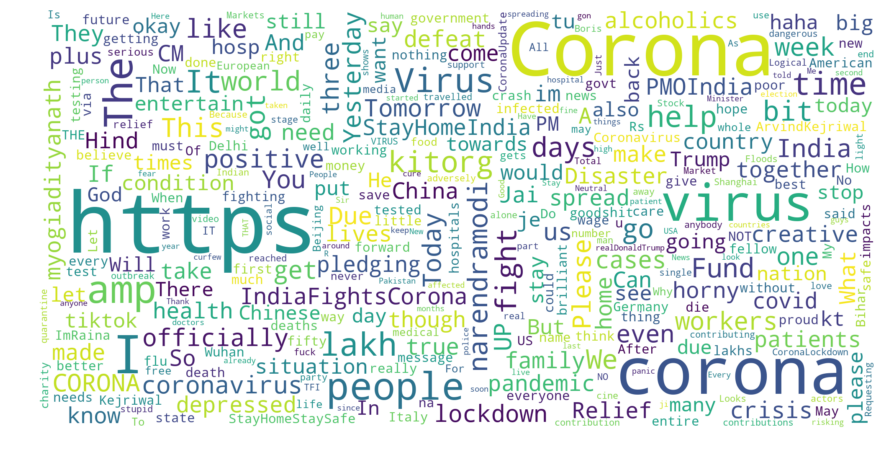

In [18]:
# tags cloud (with retweets)
# https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline

wordcloud = WordCloud(max_font_size=200, width=2000,height=1000, min_font_size=18, max_words=1000, background_color="white").generate_from_frequencies(words_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()